# Load Libraries

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [10]:
df = pd.read_csv('../Data/data_5KNN.csv')
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

# Bagging

In [12]:
bagging = BaggingRegressor(DecisionTreeRegressor(), bootstrap=True, oob_score=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators':range(1, 200),  # Number of trees in the ensemble
    'max_samples': [50, 60, 70, 80, 90],  # Proportion of training data per tree
    #'max_features': [50, 60, 70, 80, 90, 100, 110]  # Proportion of features per tree
}

# Perform Grid Search with 5-fold cross-validation
bagging_grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search model
bagging_grid.fit(X, y)

# Save results
df_bagging = pd.DataFrame(bagging_grid.cv_results_)
df_bagging.to_csv('CrossValidationResultsBagging.csv')

# Get the best model
print(bagging_grid.best_params_)

Fitting 5 folds for each of 995 candidates, totalling 4975 fits


c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
995 fits failed out of a total of 4975.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
995 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Administrator\Desktop\DTU\Sem2\Computational_data_analysis\myenv\Lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^

{'max_samples': 80, 'n_estimators': 105}


Text(0, 0.5, 'Mean test accuracy')

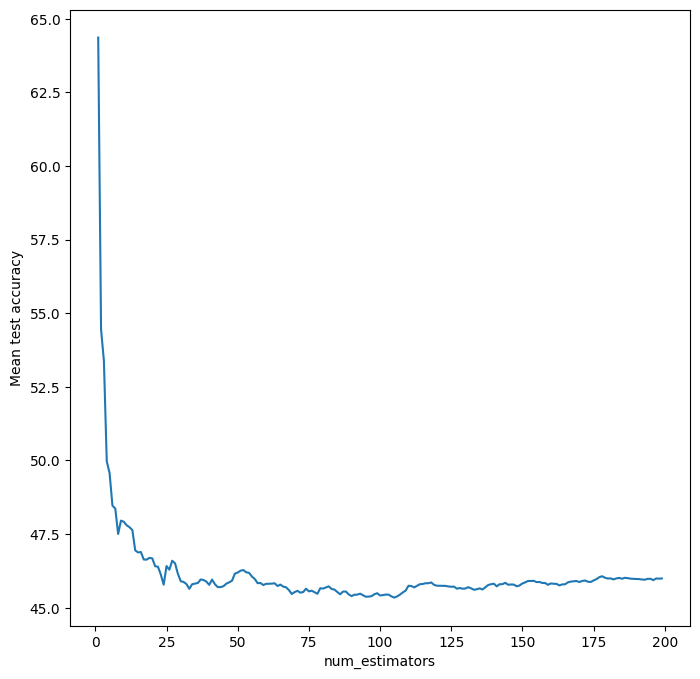

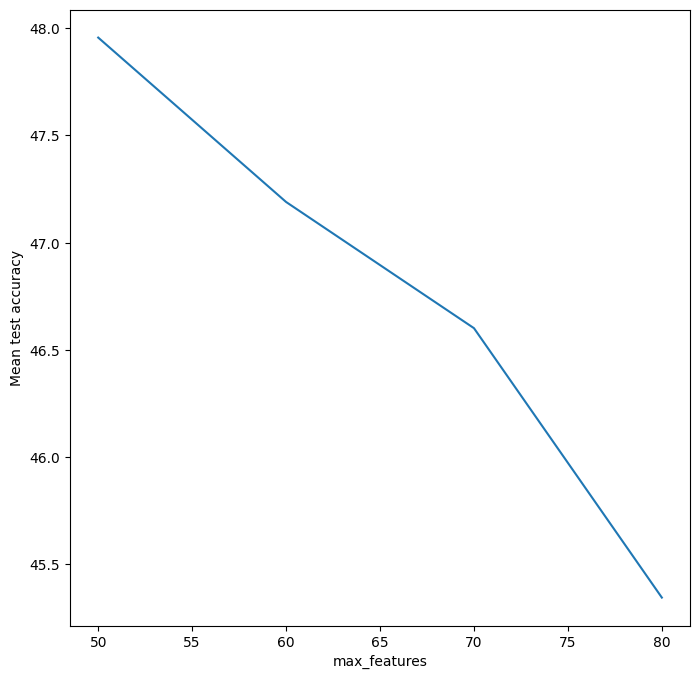

In [24]:
# Add the RMSE value
df_bagging['RMSE'] = np.sqrt(-df_bagging['mean_test_score'])

#Num estimators plot
df_num_estimators = df_bagging[((df_bagging['param_max_samples']==80))]

fig, ax = plt.subplots(figsize=(8,8))

_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('Mean test accuracy')

# Num Max samples
df_max_samples = df_bagging[(df_bagging['param_n_estimators']==105)]

fig, ax = plt.subplots(figsize=(8,8))

_ = sns.lineplot(data=df_max_samples, x='param_max_samples', y='RMSE', ax=ax)
ax.set_xlabel('max_features')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

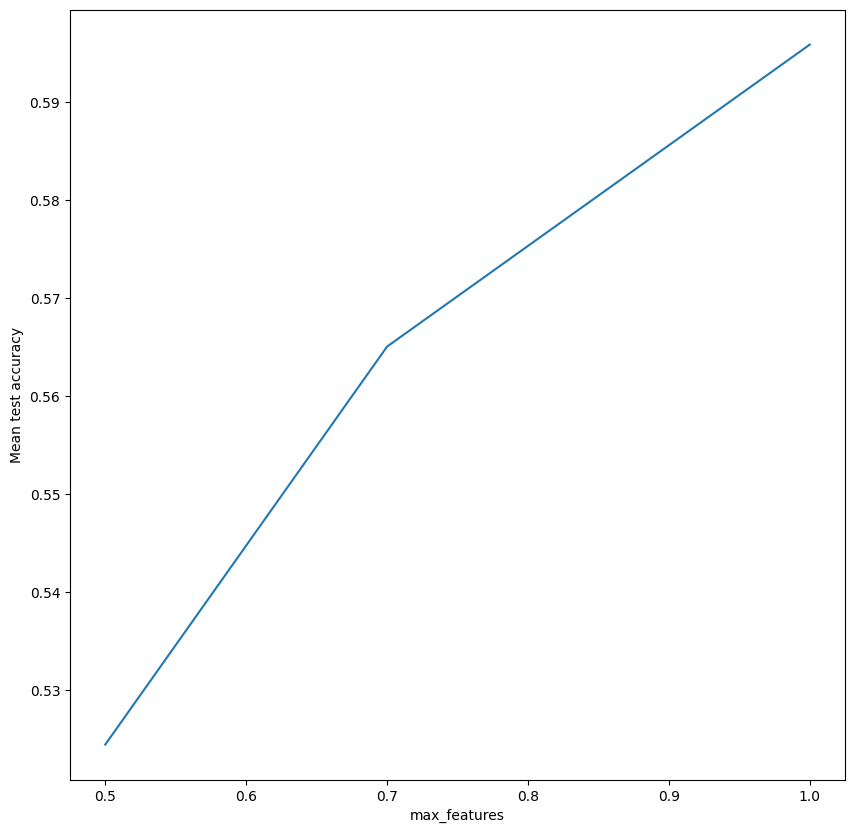

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df_max_features = df[((df['param_n_estimators']==105) & (df['param_max_samples']==1))]

fig, ax = plt.subplots(figsize=(10,10))

_ = sns.lineplot(data=df_max_features, x='param_max_features', y='mean_test_score', ax=ax)
ax.set_xlabel('max_features')
ax.set_ylabel('Mean test accuracy')

In [23]:
# Cross-validation evaluation
best_bagging = bagging_grid.best_estimator_
scores = cross_val_score(best_bagging, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for Bagging Regressor: {np.mean(rmse_scores)}")

Mean RMSE for Bagging Regressor: 44.54169499087157


# Random Forest

In [ ]:
rf = RandomForestRegressor(bootstrap=True, oob_score=True,random_state=0)

# number of trees
n_estimators = range(20,80)
max_features = range(50,116,15)
min_samples_leaf = range(1,5)

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_samples': [50, 70, 80],  # Proportion of training data per tree
    'min_samples_leaf': min_samples_leaf

}

rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
rf_grid.fit(X, y)

# Save the model
# Save results
rf_grid = pd.DataFrame(rf_grid.cv_results_)
rf_grid.to_csv('CrossValidationResultsRandomForest.csv')

# Get the best model
#print(rf_grid.best_params_)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


AttributeError: 'DataFrame' object has no attribute 'best_params_'

In [28]:
# Add the RMSE variable
rf_grid['RMSE'] = np.sqrt(-rf_grid['mean_test_score'])

best_row = rf_grid.loc[rf_grid['RMSE'].idxmin()]

# Extract best hyperparameters
rf_best_params = {
    'n_estimators': best_row['param_n_estimators'],
    'max_features': best_row['param_max_features'],
    'min_samples_leaf': best_row['param_min_samples_leaf'],
    'max_samples': best_row['param_max_samples']
}
print(rf_best_params)

{'n_estimators': np.int64(22), 'max_features': np.int64(95), 'min_samples_leaf': np.int64(2), 'max_samples': np.int64(70)}


Text(0, 0.5, 'RMSE')

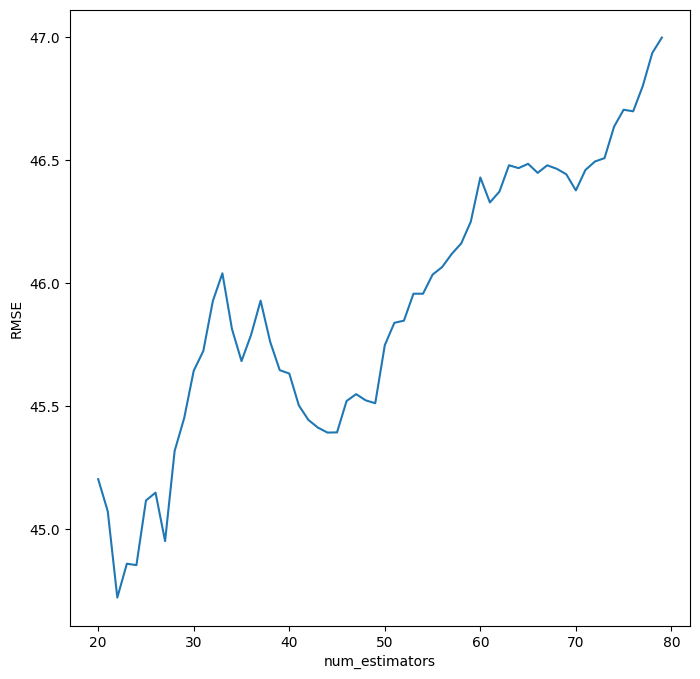

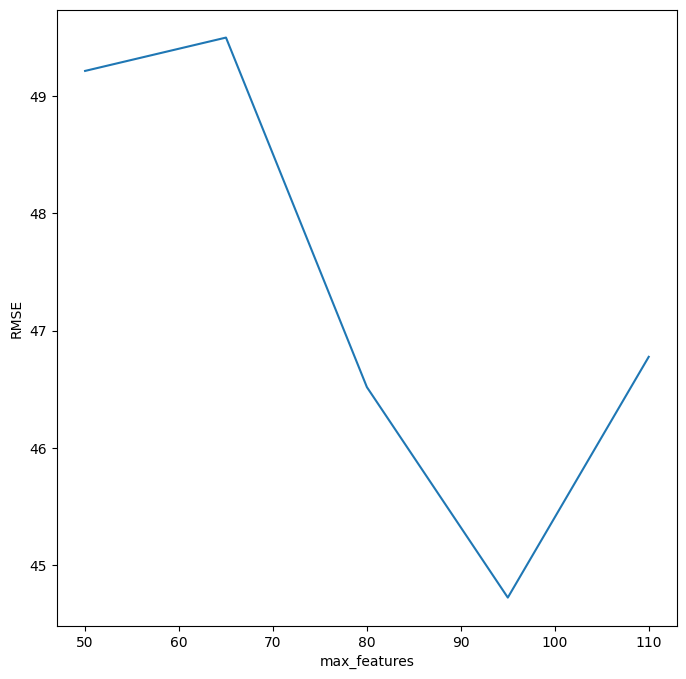

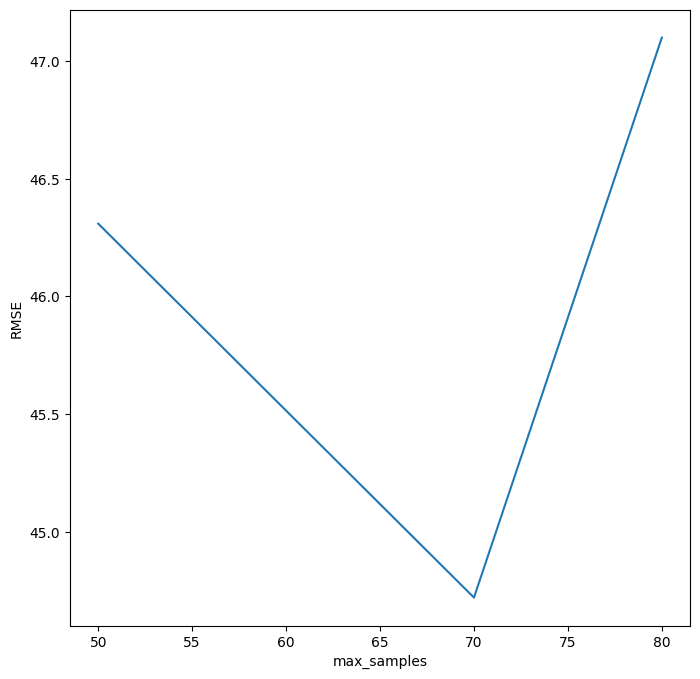

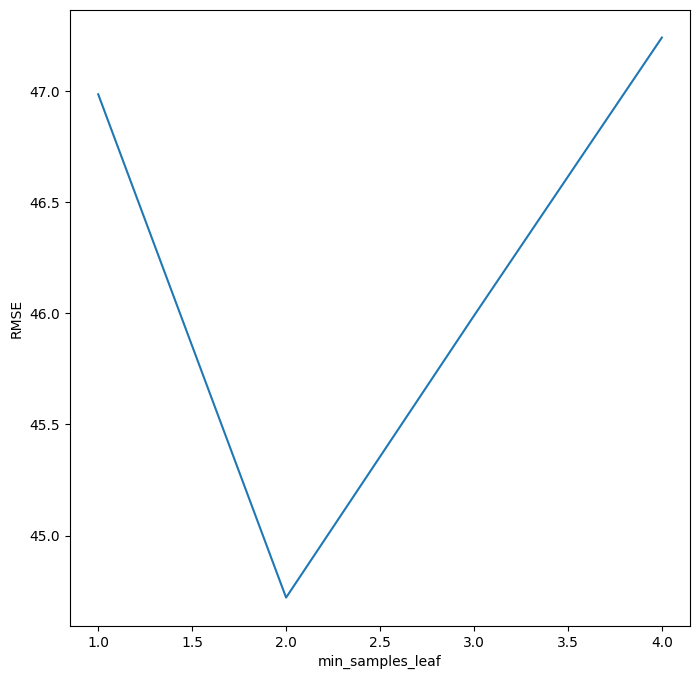

In [29]:
# Plot the number estimators 

df_num_estimators = rf_grid[((rf_grid['param_max_features']==95) & (rf_grid['param_min_samples_leaf']==2) & (rf_grid['param_max_samples']==70))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('RMSE')

# --------------------------------------------

# Plot the number of max features

df_max_features = rf_grid[((rf_grid['param_n_estimators']==22) & (rf_grid['param_min_samples_leaf']==2) & (rf_grid['param_max_samples']==70))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_features, x='param_max_features', y='RMSE', ax=ax)
ax.set_xlabel('max_features')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of samples

df_max_samples = rf_grid[((rf_grid['param_n_estimators']==22) & (rf_grid['param_min_samples_leaf']==2) & (rf_grid['param_max_features']==95))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_samples, x='param_max_samples', y='RMSE', ax=ax)
ax.set_xlabel('max_samples')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of Min leaf

df_min_samples_leaf = rf_grid[((rf_grid['param_n_estimators']==22) & (rf_grid['param_max_samples']==70) & (rf_grid['param_max_features']==95))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_min_samples_leaf, x='param_min_samples_leaf', y='RMSE', ax=ax)
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('RMSE')

In [ ]:
# Cross-validation evaluation
best_rf = rf_grid.best_estimator_
scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for Bagging Regressor: {np.mean(rmse_scores)}")

Mean RMSE for Bagging Regressor: 45.02840806880845


In [ ]:
from tabulate import tabulate

## Look at the best estimator and the importance of the features
score = rf_grid.best_estimator_.fit(X, y)
headers = ["name", "score"]
values = sorted(zip(range(0,P), rf_grid.best_estimator_.feature_importances_), key=lambda x: x[1] * -1)

# See which features are deemed most important by the classifier
# Only gonna look at the 10 most important features out of 256
print(tabulate(values[0:10], ["name", "score"][0:10], tablefmt="plain"))
print ('Random Forest OOB error rate: {}'.format(1 - rf_grid.best_estimator_.oob_score_))

> d) Add five randomly generated, white noise, variables to the dataset and investigate
how you can use their information to derive a cut-off value to select varaibles based
on the variable importances

In [ ]:
np.random.seed(0)  
white_noise = np.random.rand(X.shape[0], 5) 
X_with_white_noise_features = np.hstack((X, white_noise))  

# Here we refit the model to the data including the white noise attributes
score = rf_grid.best_estimator_.fit(X_with_white_noise_features, y)
feature_importances = rf_grid.best_estimator_.feature_importances_
headers = ["name", "score"]
#Add labels for the white noise features as well
feature_names = [f"Feature {i}" for i in range(P)] + [f"White Noise {i}" for i in range(1, 6)]
values = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances, for cut off look at the sorted list of variables
print(tabulate(values, headers=headers, tablefmt="plain"))

# Boosting

In [17]:
# Define boosting model
boosting = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': range(5, 80),
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Perform Grid Search
boosting_grid = GridSearchCV(boosting, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
boosting_grid.fit(X, y)

# Save results
boosting_df = pd.DataFrame(boosting_grid.cv_results_)
boosting_df.to_csv('CrossValidationResultsBoosting.csv')

# Get best model
best_boosting = boosting_grid.best_estimator_

# Cross-validation evaluation
scores = cross_val_score(best_boosting, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for Gradient Boosting: {np.mean(rmse_scores)}")

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Mean RMSE for Gradient Boosting: 40.49604531150364


In [30]:
print(boosting_grid.best_estimator_)
# Add the RMSE variable
boosting_df['RMSE'] = np.sqrt(-boosting_df['mean_test_score'])

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=79,
                          random_state=42)


Text(0, 0.5, 'RMSE')

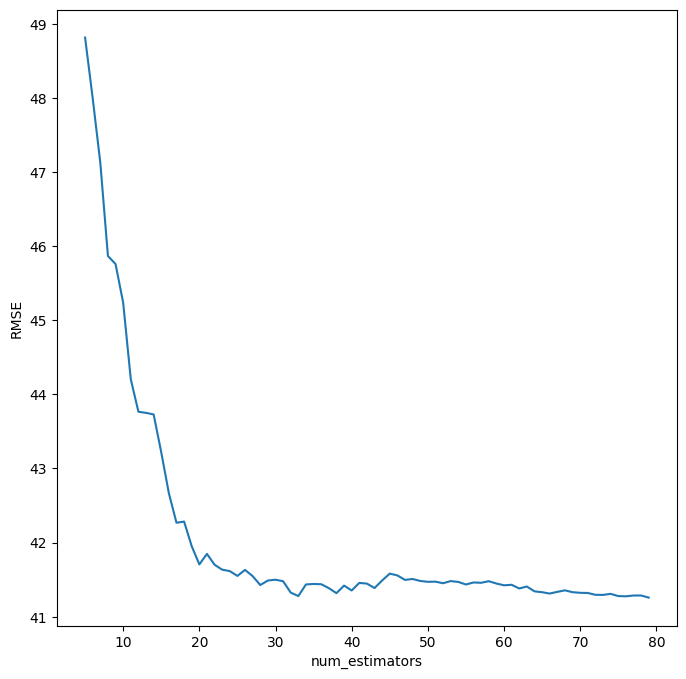

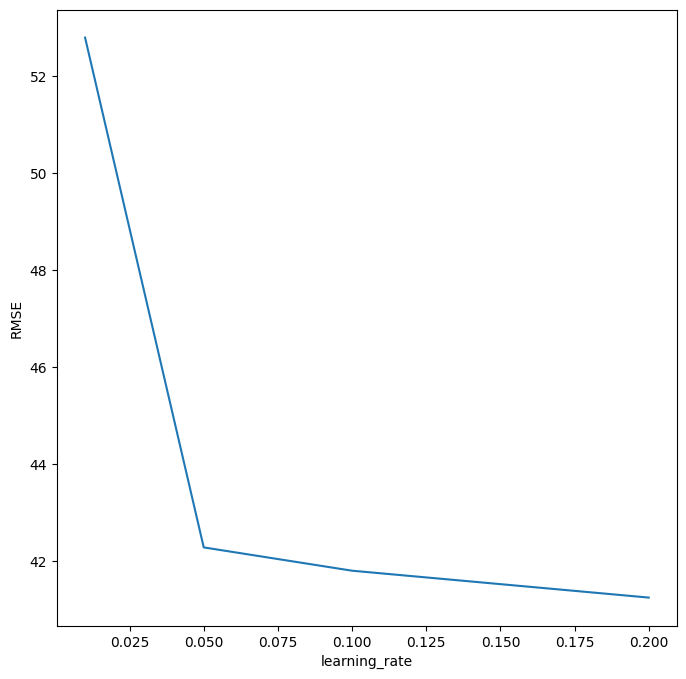

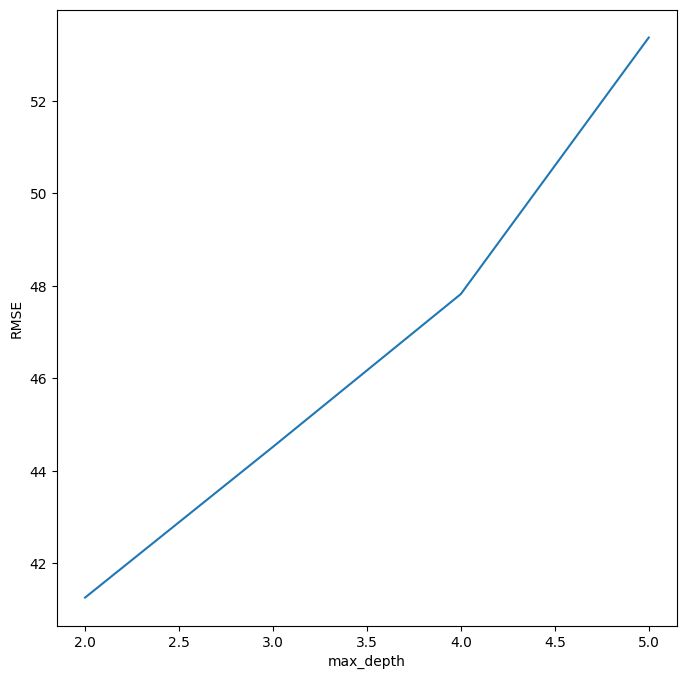

In [31]:
# Plot the number estimators 

df_num_estimators = boosting_df[((boosting_df['param_learning_rate']==0.2) & (boosting_df['param_max_depth']==2))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('RMSE')

# --------------------------------------------

# Plot the number of max features

df_learning_rate = boosting_df[((boosting_df['param_n_estimators']==79) & (boosting_df['param_max_depth']==2))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_learning_rate, x='param_learning_rate', y='RMSE', ax=ax)
ax.set_xlabel('learning_rate')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of samples

df_max_depth = boosting_df[((boosting_df['param_n_estimators']==79) & (boosting_df['param_learning_rate']==0.2))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_depth, x='param_max_depth', y='RMSE', ax=ax)
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSE')